In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
from mpl_toolkits.axes_grid1 import ImageGrid
import warnings
warnings.filterwarnings("ignore")

In [3]:
img = cv2.imread(r'''C:\Users\solov\DZ62/ph.jpeg''')

In [13]:
# Converting to black and white
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Gradient Edge Detector
sobelx = cv2.Sobel(gray, cv2.CV_32F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_32F, 0, 1, ksize=3)

# Calculation of the absolute value of the gradient
abs_sobelx = cv2.convertScaleAbs(sobelx)
abs_sobely = cv2.convertScaleAbs(sobely)
grad = cv2.addWeighted(abs_sobelx, 0.5, abs_sobely, 0.5, 0)

# Definition of angles
angle = cv2.phase(sobelx, sobely, angleInDegrees=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


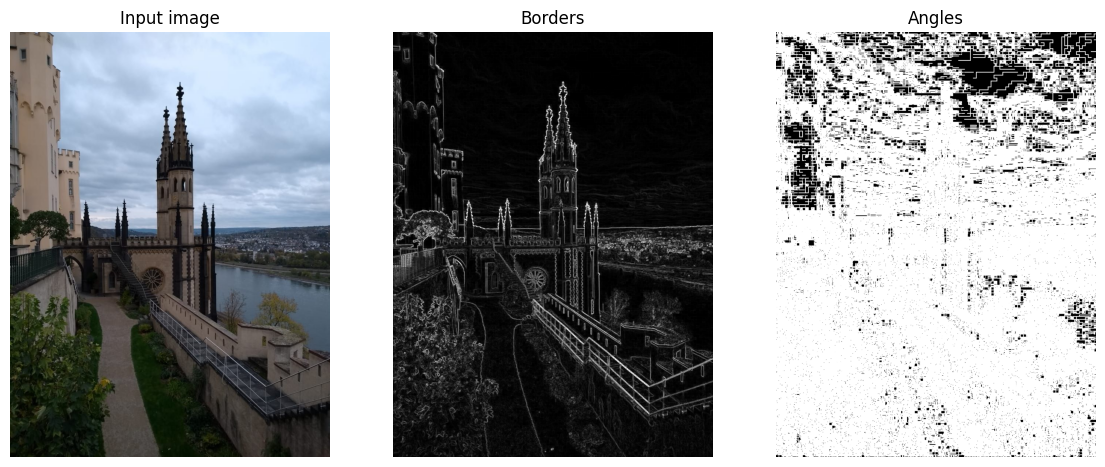

In [15]:
 #Image comparison
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grad1 = cv2.cvtColor(grad, cv2.COLOR_BGR2RGB)
angle1 = cv2.cvtColor(angle, cv2.COLOR_BGR2RGB)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 7), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img1, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(grad1, cmap=plt.cm.gray)
ax2.set_title('Borders')

ax3.axis('off')
ax3.imshow(angle1, cmap=plt.cm.gray)
ax3.set_title('Angles')
plt.show()

In [16]:
from skimage.feature import hog
from skimage import data, exposure

In [4]:
image = cv2.imread(r'''C:\Users\solov\DZ62/ph.jpeg''')

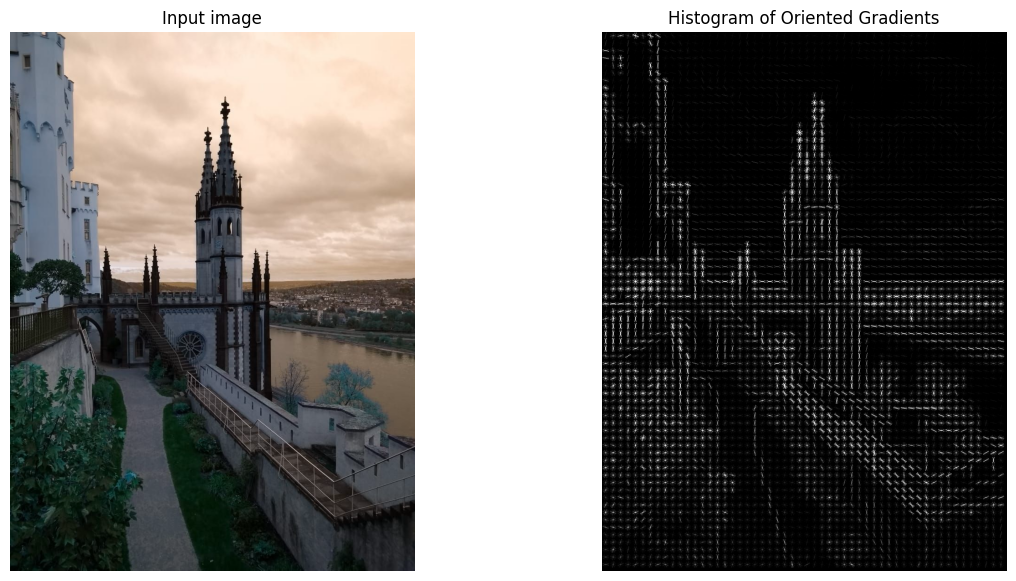

In [18]:
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

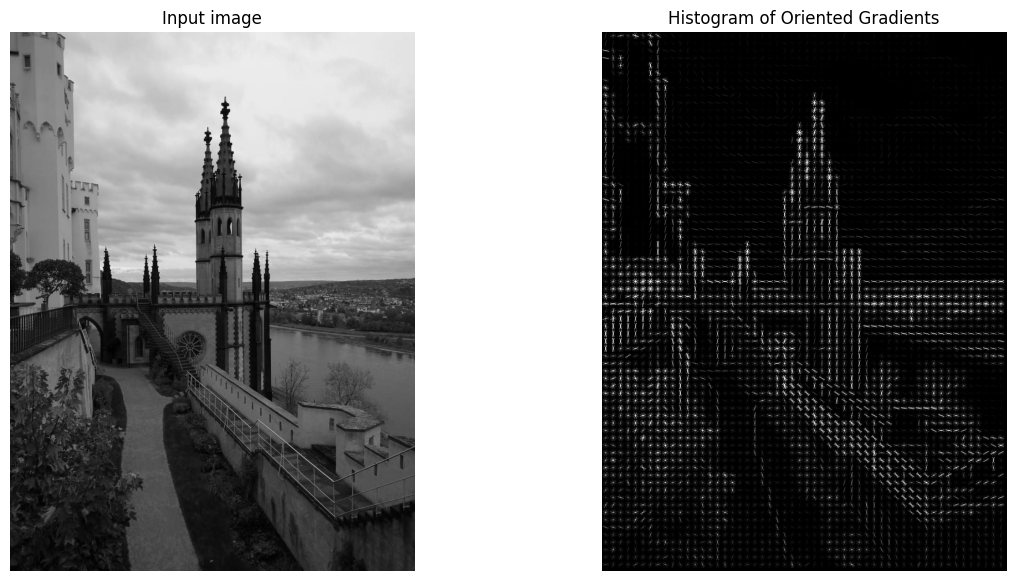

In [19]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
fd, hog_image = hog(gray, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(gray, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [25]:
import cv2
import numpy as np

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from skimage.feature import hog
from skimage import color
from tensorflow.keras.datasets import cifar10
from sklearn.decomposition import PCA
import numpy as np

In [26]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 135s 1us/step


In [27]:
train_data_gray = np.array([cv2.cvtColor(x.reshape(32, 32, 3), cv2.COLOR_BGR2GRAY) for x in x_train])
test_data_gray = np.array([cv2.cvtColor(x.reshape(32, 32, 3), cv2.COLOR_BGR2GRAY) for x in x_test])

In [28]:
train_hog_features = np.array([hog(x, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False) for x in train_data_gray])
test_hog_features = np.array([hog(x, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False) for x in test_data_gray])

In [29]:
pca = PCA(n_components=200, random_state=42)
train_pca_features = pca.fit_transform(train_hog_features)
test_pca_features = pca.transform(test_hog_features)

In [30]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [31]:
clf = SVC(kernel='rbf')
clf.fit(train_pca_features, y_train)

SVC()

In [32]:
y_pred = clf.predict(test_pca_features)

In [33]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1-Score:', f1)

Accuracy: 0.626
Precision: 0.6249679364491738
Recall: 0.626
F1-Score: 0.6246989635968799


In [34]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [35]:
x_train_gray = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in x_train])
x_test_gray = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in x_test])

In [36]:
sift = cv2.SIFT_create()

In [37]:
sift_train_features = []
sift_train_labels = []
for i in range(len(x_train_gray)):
    keypoints, descriptors = sift.detectAndCompute(x_train_gray[i], None)
    if descriptors is not None:
        sift_train_features.append(descriptors)
        sift_train_labels.append(y_train[i])

In [38]:
sift_test_features = []
sift_test_labels = []
for i in range(len(x_test_gray)):
    keypoints, descriptors = sift.detectAndCompute(x_test_gray[i], None)
    if descriptors is not None:
        sift_test_features.append(descriptors)
        sift_test_labels.append(y_test[i])

In [39]:
max_descriptors = max([len(desc) for desc in sift_train_features])
sift_train_features_arr = np.zeros((len(sift_train_features), max_descriptors, 128))
for i in range(len(sift_train_features)):
    for j in range(len(sift_train_features[i])):
        sift_train_features_arr[i][j] = sift_train_features[i][j]

In [40]:
max_descriptors = max([len(desc) for desc in sift_test_features])
sift_test_features_arr = np.zeros((len(sift_test_features), max_descriptors, 128))
for i in range(len(sift_test_features)):
    for j in range(len(sift_test_features[i])):
        sift_test_features_arr[i][j] = sift_test_features[i][j]

In [41]:
new_sift_train_features_arr = sift_train_features_arr.reshape(len(sift_train_features_arr), -1)
new_sift_test_features_arr = sift_test_features_arr.reshape(len(sift_test_features_arr), -1)

In [42]:
pca = PCA(n_components=200)
train_pca_features_shift = pca.fit_transform(new_sift_train_features_arr)
test_pca_features_shift = pca.fit_transform(new_sift_test_features_arr)

In [43]:
new_sift_train_labels = []
for i in sift_train_labels:
  new_sift_train_labels.append(i[0])

In [44]:
new_sift_test_labels = []
for i in sift_test_labels:
  new_sift_test_labels.append(i[0])

In [45]:
clf = SVC(kernel='rbf')
clf.fit(train_pca_features_shift, new_sift_train_labels)

SVC()

In [46]:
y_pred = clf.predict(test_pca_features_shift)

In [47]:
accuracy = accuracy_score(new_sift_test_labels, y_pred)
precision = precision_score(new_sift_test_labels, y_pred, average='macro')
recall = recall_score(new_sift_test_labels, y_pred, average='macro')
f1 = f1_score(new_sift_test_labels, y_pred, average='macro')


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.1903568564554932
Precision: 0.1872829895291563
Recall: 0.190437820367291
F1-score: 0.1875344201976335
